In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['font.size'] = 15

# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [2]:
import initial_condition
from analysis import weight
from analysis import rank as vr


In [3]:
global data_dir, output_dir
data_dir = '../../data/processed/internal/technology/'
ex_dir = '../../data/processed/external/schmoch/'
output_dir = '../../output/'


In [4]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT
applicant_weight = initial_condition.APPLICANT_WEIGHT

extract_population = initial_condition.EXTRACT_POPULATION
top_p_or_num = initial_condition.TOP_P_OR_NUM
# top_p_or_num = ('num', 300)

color_list = initial_condition.COLOR_LIST

In [5]:
df = pd.read_csv(f'{data_dir}{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.csv', 
                 sep=',')
schmoch_df = pd.read_csv(f'{ex_dir}35.csv', 
                         encoding='utf-8', 
                         sep=',', 
                         usecols=['Field_number', 'Field_en']
                         ).drop_duplicates()
df = pd.merge(df, schmoch_df, left_on=classification, 
              right_on='Field_number', how='left').drop(columns=['Field_number', classification])\
    .rename(columns={'Field_en': classification})
df

,app_year_period,reg_num,right_person_name,ubiquity,tci,ki_1,ki_2,ki_3,ki_4,ki_5,...,ki_12,ki_13,ki_14,ki_15,ki_16,ki_17,ki_18,ki_19,ki_20,schmoch35
0,1981-1990,56237.000,2320,1548,0.840,3.278,1623.232,3.445,1704.178,3.506,...,1873.799,3.523,1888.902,3.520,1898.870,3.518,1905.404,3.516,1909.665,"Electrical machinery, apparatus, energy"
1,1981-1990,53789.500,1429,840,1.047,3.421,1218.110,3.548,1460.229,3.576,...,1831.360,3.537,1860.724,3.529,1880.125,3.524,1892.932,3.520,1901.374,Audio-visual technology
2,1981-1990,24554.833,787,485,1.323,3.955,931.267,3.914,1259.003,3.789,...,1795.506,3.557,1837.760,3.540,1865.407,3.530,1883.488,3.524,1895.307,Telecommunications
3,1981-1990,4254.333,260,175,1.276,5.617,880.402,4.298,1266.732,3.870,...,1802.319,3.553,1842.262,3.538,1868.352,3.529,1885.406,3.523,1896.554,Digital communication
4,1981-1990,12490.000,495,326,1.159,4.994,960.473,4.156,1320.096,3.828,...,1813.018,3.551,1849.313,3.537,1872.997,3.528,1888.466,3.522,1898.568,Basic communication processes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2001-2010,36964.500,3177,2391,0.157,3.463,2774.303,3.378,2910.458,3.360,...,2895.201,3.396,2876.412,3.403,2861.209,3.408,2849.451,3.412,2840.595,Mechanical elements
136,2001-2010,63028.000,2458,1849,-0.063,2.979,2442.137,3.114,2718.901,3.207,...,2880.475,3.371,2869.340,3.387,2858.018,3.398,2848.159,3.405,2840.188,Transport
137,2001-2010,62899.500,3335,2666,-0.276,2.333,2798.816,2.638,2858.286,2.867,...,2865.326,3.293,2855.736,3.334,2847.166,3.362,2840.013,3.381,2834.289,"Furniture, games"
138,2001-2010,21621.000,3062,2561,-0.128,2.722,2623.782,2.959,2677.470,3.117,...,2786.330,3.364,2796.587,3.384,2803.504,3.397,2808.123,3.406,2811.184,Other consumer goods


In [6]:
schmoch_df[schmoch_df['Field_en'].str.contains('nano')]

,Field_number,Field_en
307,22,Micro-structural and nano-technology


In [7]:
df[df[f'{ar}_{year_style}_period']=='1981-2010']['reg_num'].sum()

3163924.0

In [8]:
df[df[classification].str.contains('nano')]

,app_year_period,reg_num,right_person_name,ubiquity,tci,ki_1,ki_2,ki_3,ki_4,ki_5,...,ki_12,ki_13,ki_14,ki_15,ki_16,ki_17,ki_18,ki_19,ki_20,schmoch35
21,1981-1990,0.500,1,1,-0.910,13.000,1289.154,4.882,1588.615,3.973,...,1869.925,3.564,1887.173,3.544,1898.028,3.532,1904.909,3.525,1909.299,Micro-structural and nano-technology
56,1981-2010,796.000,205,177,0.507,8.661,2922.260,4.736,3954.158,3.900,...,5085.260,3.488,5166.678,3.471,5221.031,3.460,5257.562,3.453,5282.231,Micro-structural and nano-technology
91,1991-2000,98.500,44,38,-0.684,8.474,1563.197,4.587,2123.197,3.790,...,2767.397,3.399,2817.937,3.380,2852.462,3.368,2876.170,3.360,2892.508,Micro-structural and nano-technology
126,2001-2010,697.000,190,167,-0.382,8.760,1710.414,4.739,2201.018,3.899,...,2691.679,3.483,2729.527,3.463,2755.706,3.450,2773.929,3.441,2786.667,Micro-structural and nano-technology


In [9]:
df[df['schmoch35'].isin(['Analysis of biological materials',
 'Organic fine chemistry',
 'Biotechnology',
 'Pharmaceuticals',
 'Macromolecular chemistry, polymers',
 'Food chemistry',
 'Basic materials chemistry',
 'Materials, metallurgy',
 'Surface technology, coating',
 'Chemical engineering',
 'Other special machines'])&(df[f'{ar}_{year_style}_period']=='1981-2010')]

,app_year_period,reg_num,right_person_name,ubiquity,tci,ki_1,ki_2,ki_3,ki_4,ki_5,...,ki_12,ki_13,ki_14,ki_15,ki_16,ki_17,ki_18,ki_19,ki_20,schmoch35
45,1981-2010,8334.500,1430,1179,-0.711,5.802,3338.012,4.478,4212.004,3.962,...,5140.939,3.507,5205.679,3.483,5248.551,3.468,5277.074,3.458,5296.106,Analysis of biological materials
48,1981-2010,55144.333,2324,1915,-1.426,4.700,3065.480,4.320,3874.687,4.010,...,5080.501,3.532,5167.780,3.499,5224.540,3.479,5261.721,3.465,5286.222,Organic fine chemistry
49,1981-2010,23581.000,2331,2073,-1.240,5.045,3328.147,4.355,4076.406,3.974,...,5106.238,3.520,5182.496,3.492,5232.954,3.474,5266.532,3.463,5288.967,Biotechnology
50,1981-2010,18113.000,1887,1726,-1.693,4.634,2960.197,4.292,3792.832,4.003,...,5048.218,3.537,5143.859,3.504,5207.110,3.482,5249.182,3.468,5277.291,Pharmaceuticals
51,1981-2010,77762.333,2290,1549,-0.753,5.282,3705.737,4.257,4535.900,3.848,...,5243.238,3.488,5277.962,3.470,5299.236,3.459,5312.443,3.452,5320.713,"Macromolecular chemistry, polymers"
52,1981-2010,30630.000,5130,4741,-2.867,2.771,4765.614,3.138,4837.935,3.326,...,5152.102,3.472,5200.821,3.469,5237.896,3.464,5265.497,3.459,5285.700,Food chemistry
53,1981-2010,56975.167,4561,3730,-0.838,4.293,4311.487,3.987,4712.273,3.777,...,5253.488,3.488,5285.311,3.470,5304.537,3.459,5316.237,3.452,5323.403,Basic materials chemistry
54,1981-2010,106913.333,4968,3813,-0.374,3.923,4598.396,3.772,4993.027,3.650,...,5340.041,3.467,5346.153,3.456,5347.010,3.449,5345.742,3.446,5343.823,"Materials, metallurgy"
55,1981-2010,78437.833,5183,4060,-0.180,4.223,4732.292,3.826,5056.136,3.635,...,5331.209,3.457,5337.449,3.450,5339.548,3.446,5339.785,3.443,5339.265,"Surface technology, coating"
57,1981-2010,60786.000,7129,6000,-0.416,4.027,5473.457,3.767,5334.993,3.625,...,5334.894,3.461,5338.216,3.453,5339.441,3.448,5339.495,3.445,5338.997,Chemical engineering


In [10]:
df[df[f'{ar}_{year_style}_period']=='1981-2010'].sort_values('tci', ascending=False).head(15)
df[df[f'{ar}_{year_style}_period']=='1981-2010'].sort_values('tci', ascending=False).tail(15)

,app_year_period,reg_num,right_person_name,ubiquity,tci,ki_1,ki_2,ki_3,ki_4,ki_5,...,ki_12,ki_13,ki_14,ki_15,ki_16,ki_17,ki_18,ki_19,ki_20,schmoch35
64,1981-2010,72946.500,3626,2688,-0.120,3.773,4204.172,3.602,4885.221,3.518,...,5367.819,3.442,5367.329,3.440,5362.261,3.439,5356.370,3.439,5351.076,Thermal processes and apparatus
59,1981-2010,113795.833,9234,7440,-0.132,3.134,6440.986,3.254,5924.739,3.328,...,5396.423,3.426,5372.683,3.432,5358.797,3.435,5350.404,3.437,5345.171,Handling
55,1981-2010,78437.833,5183,4060,-0.180,4.223,4732.292,3.826,5056.136,3.635,...,5331.209,3.457,5337.449,3.450,5339.548,3.446,5339.785,3.443,5339.265,"Surface technology, coating"
47,1981-2010,70177.000,5247,4211,-0.234,3.418,4409.364,3.523,4636.871,3.539,...,5169.643,3.474,5223.107,3.463,5259.600,3.456,5284.306,3.451,5300.946,Medical technology
54,1981-2010,106913.333,4968,3813,-0.374,3.923,4598.396,3.772,4993.027,3.650,...,5340.041,3.467,5346.153,3.456,5347.010,3.449,5345.742,3.446,5343.823,"Materials, metallurgy"
57,1981-2010,60786.000,7129,6000,-0.416,4.027,5473.457,3.767,5334.993,3.625,...,5334.894,3.461,5338.216,3.453,5339.441,3.448,5339.495,3.445,5338.997,Chemical engineering
58,1981-2010,51686.333,5894,4963,-0.443,3.683,5236.410,3.620,5353.762,3.558,...,5389.923,3.454,5378.389,3.448,5368.098,3.445,5359.652,3.443,5353.049,Environmental technology
63,1981-2010,119220.667,10356,8546,-0.570,3.133,7086.600,3.294,6319.883,3.368,...,5467.158,3.434,5420.185,3.436,5390.916,3.438,5372.239,3.439,5360.076,Other special machines
45,1981-2010,8334.500,1430,1179,-0.711,5.802,3338.012,4.478,4212.004,3.962,...,5140.939,3.507,5205.679,3.483,5248.551,3.468,5277.074,3.458,5296.106,Analysis of biological materials
51,1981-2010,77762.333,2290,1549,-0.753,5.282,3705.737,4.257,4535.900,3.848,...,5243.238,3.488,5277.962,3.470,5299.236,3.459,5312.443,3.452,5320.713,"Macromolecular chemistry, polymers"


1981-2010 0.333


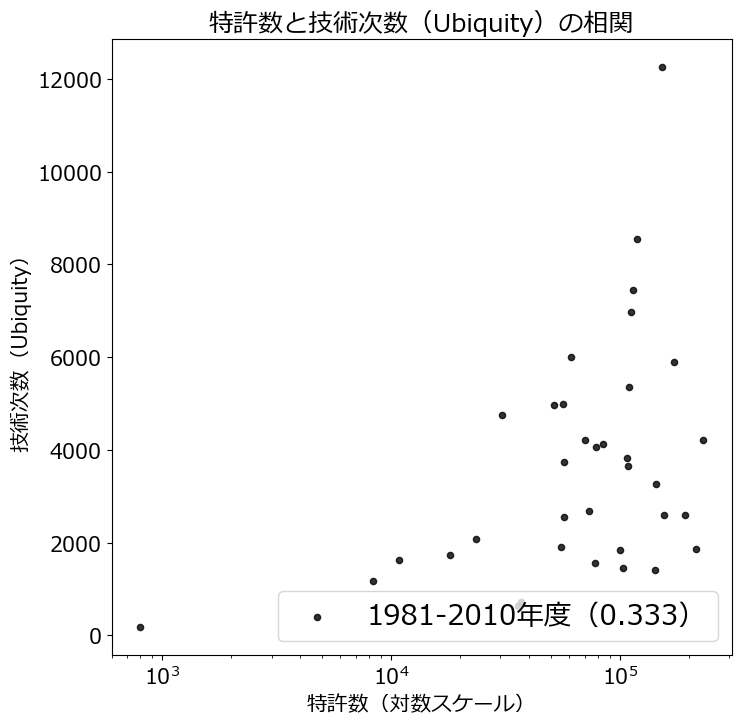

1981-2010 0.248


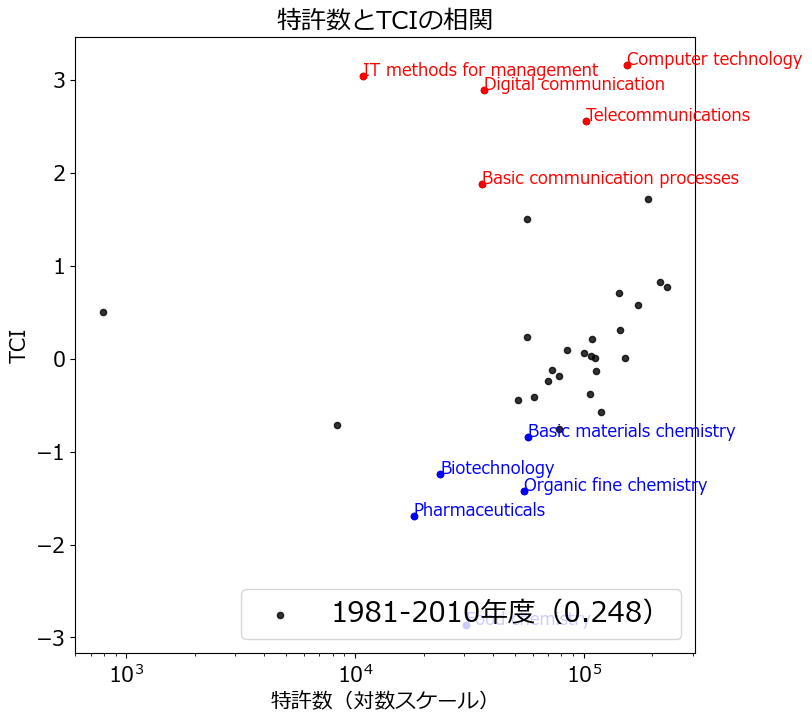

1981-2010 -0.281


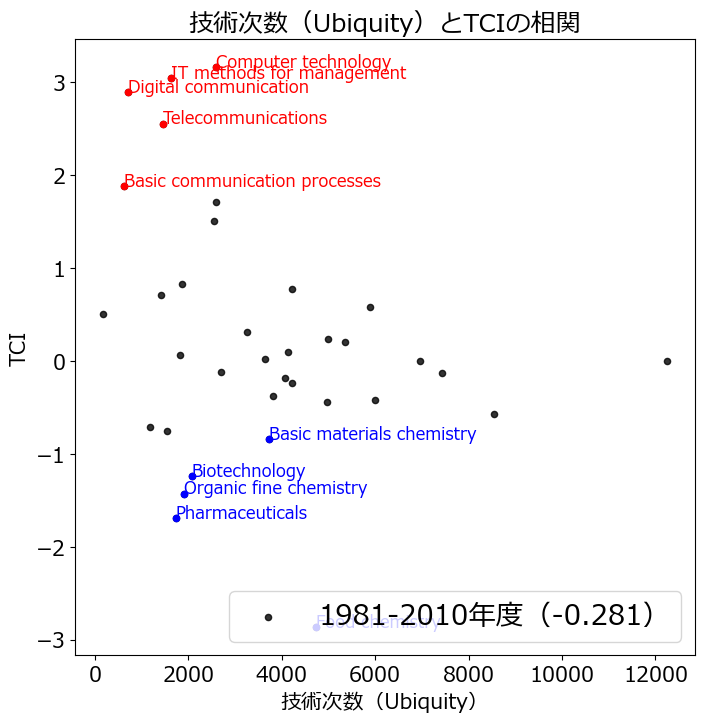

1981-2010 -0.622


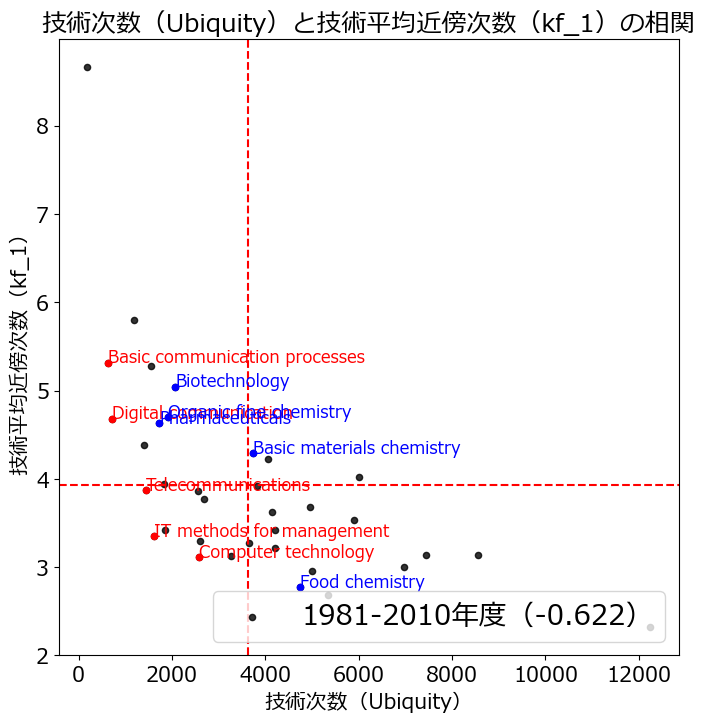

1981-2010 -0.225


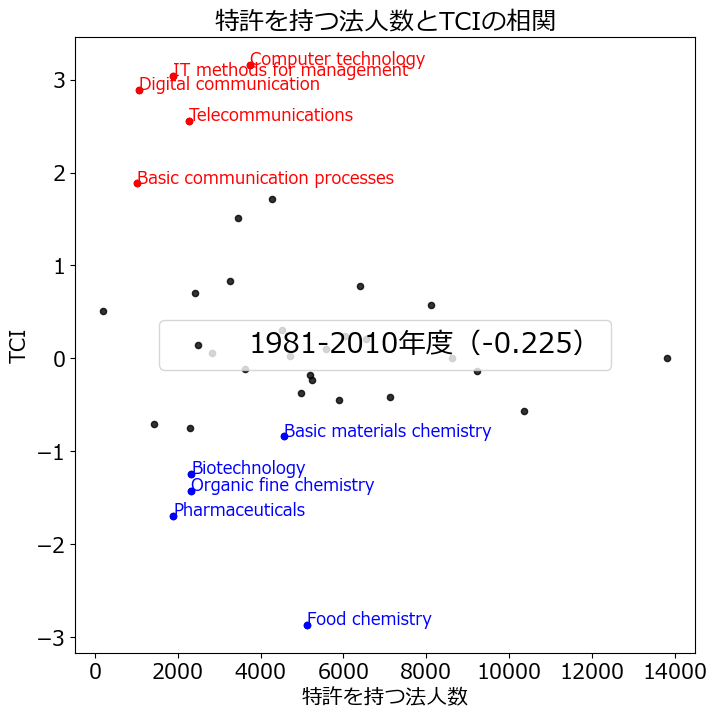

In [11]:
df_dict = {}
combi_dict = {# ind: [x, y, title, xlabel, ylabel, legend_loc]
              1: ['reg_num', 'ubiquity', '特許数と技術次数（Ubiquity）の相関', '特許数（対数スケール）', '技術次数（Ubiquity）', 'lower right'], 
              2: ['reg_num', 'tci', '特許数とTCIの相関', '特許数（対数スケール）', 'TCI', 'lower right'], 
              3: ['ubiquity', 'tci', '技術次数（Ubiquity）とTCIの相関', '技術次数（Ubiquity）', 'TCI', 'lower right'], 
              4: ['ubiquity', 'ki_1', '技術次数（Ubiquity）と技術平均近傍次数（kf_1）の相関', '技術次数（Ubiquity）', '技術平均近傍次数（kf_1）', 'lower right'], 
              5: ['right_person_name', 'tci', '特許を持つ法人数とTCIの相関', '特許を持つ法人数', 'TCI', 'center']
              }

for i, combi in combi_dict.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    period = f'{year_start}-{year_end}'
    corr_num = round(df[df[f'{ar}_{year_style}_period']==period][combi[0]].corr(df[df[f'{ar}_{year_style}_period']==period][combi[1]]), 3)
    print(period, corr_num)
    ax.scatter(df[df[f'{ar}_{year_style}_period']==period][combi[0]], 
                df[df[f'{ar}_{year_style}_period']==period][combi[1]], s=20, 
                alpha=0.8, label=f'{period}年度（{corr_num}）', color='black')
    if i == 4:
        ax.axvline(x=df[df[f'{ar}_{year_style}_period']==period][combi[0]].mean(), color='red', linestyle='--')
        ax.axhline(y=df[df[f'{ar}_{year_style}_period']==period][combi[1]].mean(), color='red', linestyle='--')
    ax.set_title(combi[2])
    if combi[0] in ['reg_num']: ax.set_xscale('log')
    if combi[1] in ['reg_num']: ax.set_yscale('log')
    x_min = df[(df[f'{ar}_{year_style}_period']==period)][combi[0]].min()
    x_2smallest = df[(df[f'{ar}_{year_style}_period']==period)][combi[0]].nsmallest(2).iloc[1]
    y_2smallest = df[(df[f'{ar}_{year_style}_period']==period)][combi[1]].nsmallest(2).iloc[1]
    if i in [2, 3, 4, 5]: 
        # ax.text(x_min-1,
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_min)][combi[1]].values[0]-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_min)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        # ax.text(x_min-1,
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_2smallest)][combi[1]].values[0]-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_2smallest)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        # ax.text(df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[1]]==y_2smallest)][combi[0]].values[0]-1,
        #         y_2smallest-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[1]]==y_2smallest)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        for i, row in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).reset_index(drop=True).iterrows():
            
        #     # if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).iloc[25:51,:]['right_person_name'].values:
        #     #     # ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='orange')
        #     #     if i+1!=51: ax.scatter(row[combi[0]], row[combi[1]], s=20, color='orange')
        #     # if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).iloc[51:76,:]['right_person_name'].values:
        #     #     # ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='green')
        #     #     ax.scatter(row[combi[0]], row[combi[1]], s=20, color='green')
        #     if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).tail(25)['right_person_name'].values:
        #         ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=10, color='blue')
        #         ax.scatter(row[combi[0]], row[combi[1]], s=20, color='blue')
            if row['schmoch35'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).head(5)['schmoch35'].values:
                ax.text(row[combi[0]], row[combi[1]], row['schmoch35'], fontsize=12, color='red')
                ax.scatter(row[combi[0]], row[combi[1]], s=20, color='red')
            if row['schmoch35'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).tail(5)['schmoch35'].values:
                # display(row)
                ax.text(row[combi[0]], row[combi[1]], row['schmoch35'], fontsize=12, color='blue')
                ax.scatter(row[combi[0]], row[combi[1]], s=20, color='blue')
    # if i == 3:
    #     for i, row in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).reset_index(drop=True).iterrows():
    #         if row['schmoch35'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('tci', ascending=False).tail(15)['schmoch35'].values:
    #             ax.text(row[combi[0]], row[combi[1]], i+1, fontsize=10, color='blue')
    #             ax.scatter(row[combi[0]], row[combi[1]], s=20, color='blue')
        
    ax.set_ylabel(combi[4])
    ax.set_xlabel(combi[3])
    ax.legend(loc=combi[5], fontsize=20)
    plt.show()
    

C:\Users\rin\AppData\Local\Temp\ipykernel_19528\805485573.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plot_df.index, fontsize=15)
C:\Users\rin\AppData\Local\Temp\ipykernel_19528\805485573.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([x for x in range(0, 80000+1, 20000)], fontsize=20, rotation=90)
C:\Users\rin\AppData\Local\Temp\ipykernel_19528\805485573.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  xax2.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=20, rotation=90)
C:\Users\rin\AppData\Local\Temp\ipykernel_19528\805485573.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(plot_df.index, fontsize=15)
C:\Users\rin\AppData\Local\Temp\ipykernel_19528\805485573.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([x for x in

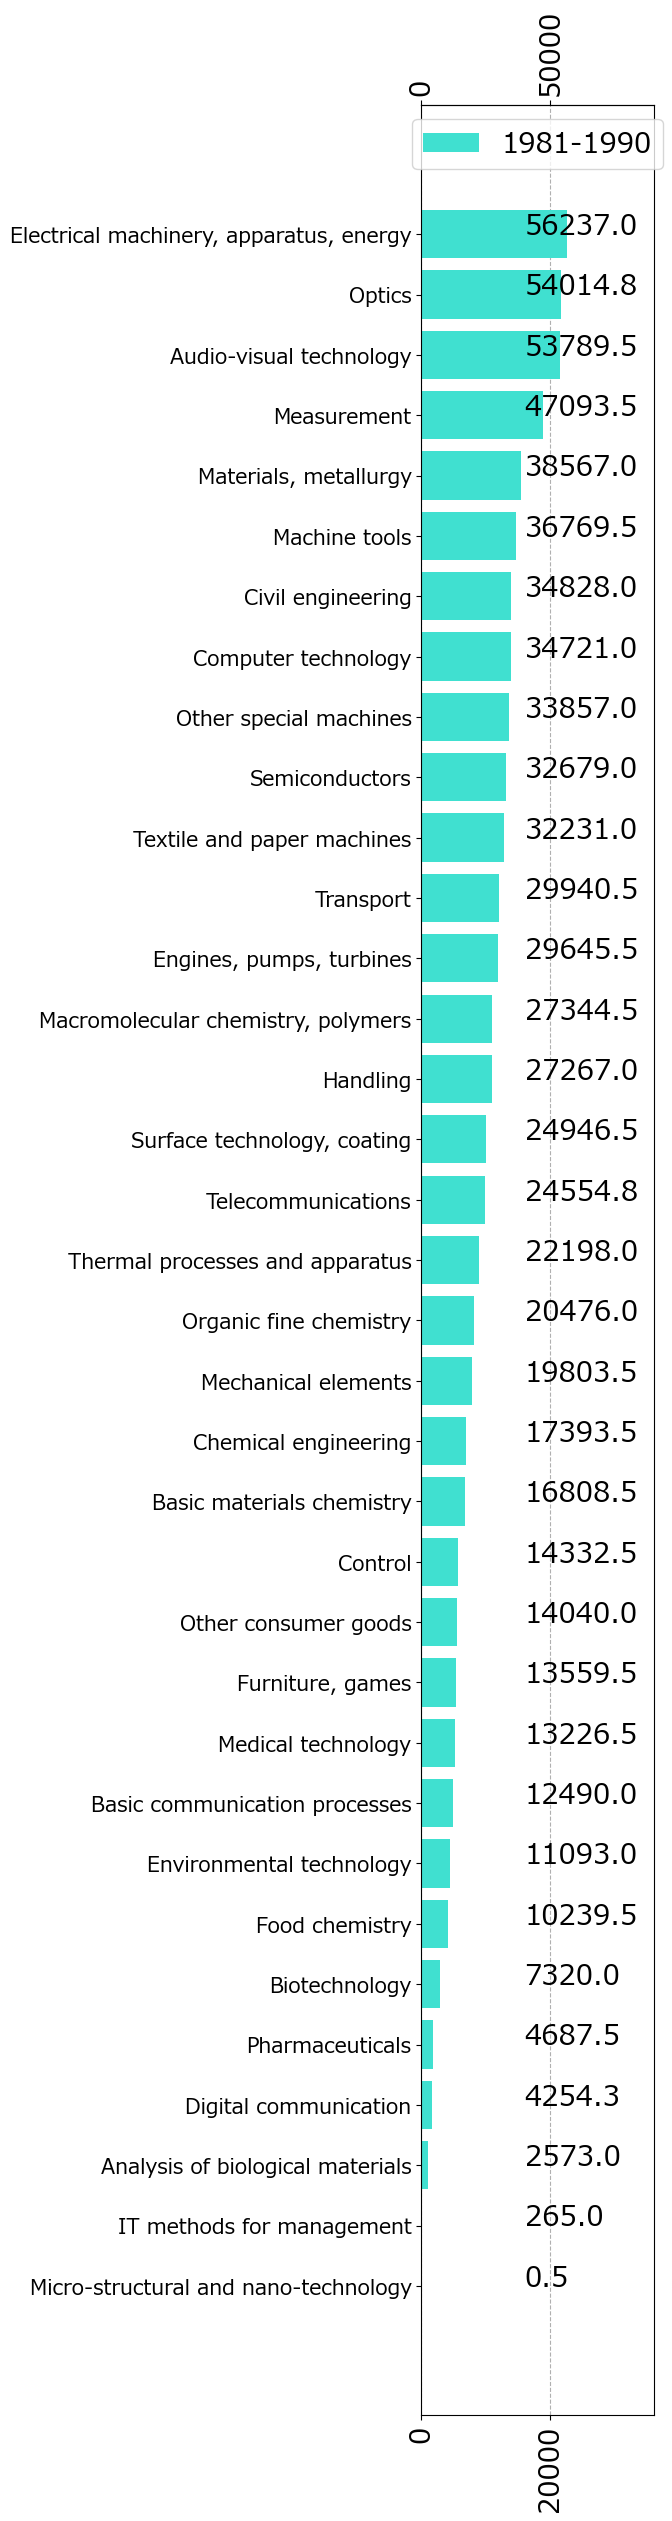

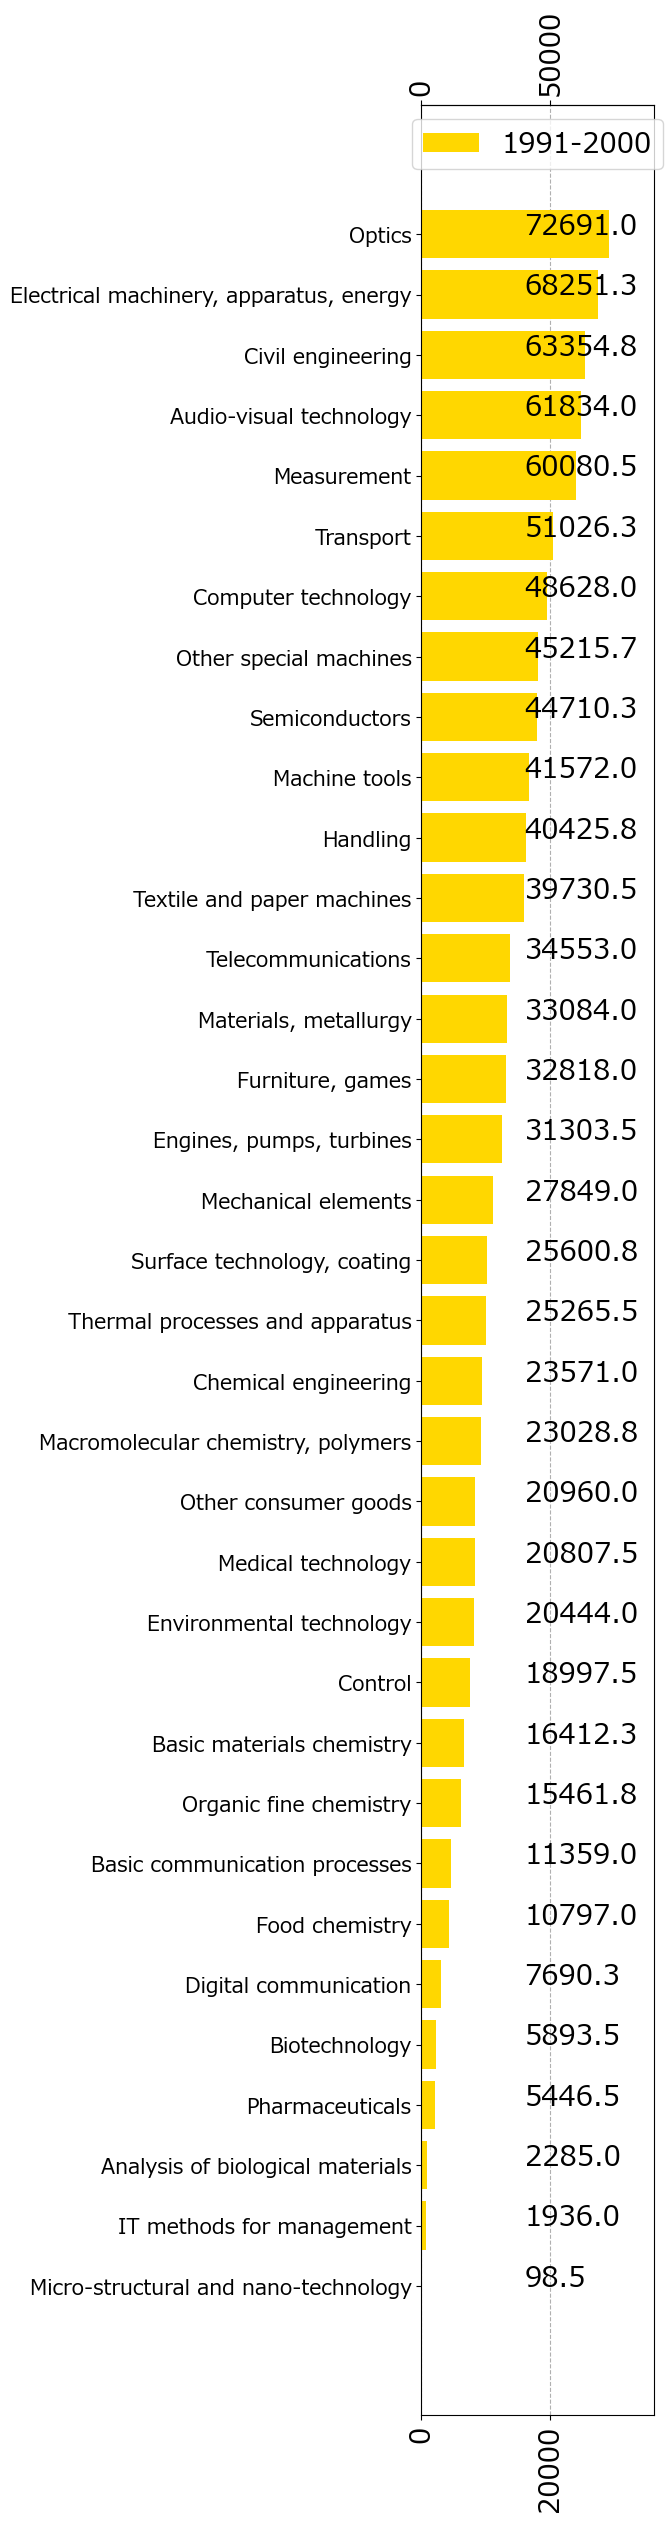

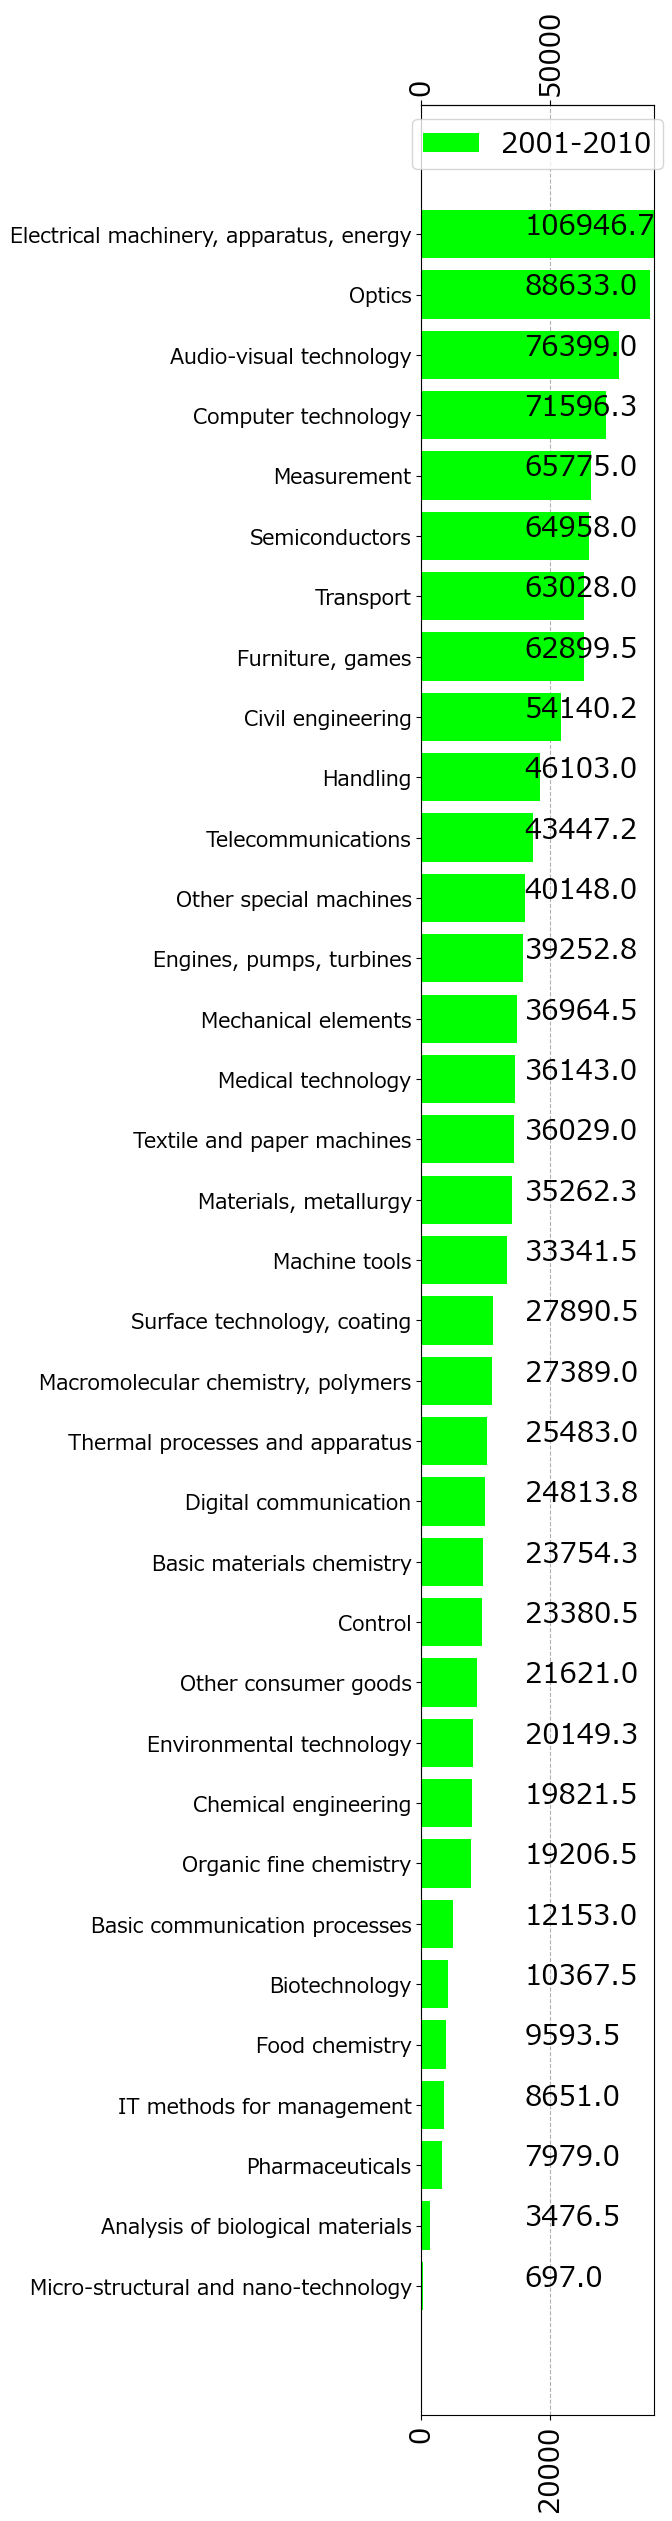

In [12]:
# fig, ax = plt.subplots(figsize=(20, 40), squeeze=False, sharey=False)


color_count = 0
for period in range(year_start, year_end+1, year_range):
     fig, ax = plt.subplots(figsize=(3, 30))
     period = f'{period}-{period+year_range-1}'
     plot_df = df[df[f'{ar}_{year_style}_period'] == period].groupby([classification])[['reg_num']].sum().sort_values('reg_num', ascending=True)
     ax.barh(list(plot_df.index), list(plot_df['reg_num'].values), color=color_list[color_count], label=period)
     ax.set_yticklabels(plot_df.index, fontsize=15)
     ax.set_xticklabels([x for x in range(0, 80000+1, 20000)], fontsize=20, rotation=90)
     ax.set_xlim(0, 90000)
     # ax.set_xticklabels(fontsize=15, rotation=90)
     xax2 = ax.secondary_xaxis('top')
     # xax2.xaxis.set_major_formatter(ptick.FuncFormatter(lambda x, _: f'{int(x):,}'))
     xax2.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=20, rotation=90)
     xax2.set_xlim(ax.get_xlim())
     ax.legend(fontsize=20, loc='upper center')
     ax.set_axisbelow(True)
     ax.grid(which='major', axis='x', linestyle='--')
     c_i = 0
     for c in plot_df.index:
          reg_num = plot_df[plot_df.index==c]['reg_num'].values[0]
          ax.text(x=40000, y=c_i, s=round(reg_num, 1), fontsize=20, color='black')
     #     ax.set_xticklabels(df[df[f'{ar}_{year_style}_period'] == period].groupby([classification])['reg_num'].sum().index, rotation=90, fontsize=15)
          c_i += 1
     color_count += 1
plt.show()

In [13]:
plot_df

,reg_num
schmoch35,
Micro-structural and nano-technology,697.000
Analysis of biological materials,3476.500
Pharmaceuticals,7979.000
IT methods for management,8651.000
Food chemistry,9593.500
Biotechnology,10367.500
Basic communication processes,12153.000
Organic fine chemistry,19206.500
Chemical engineering,19821.500


c:\Users\rin\Desktop\KCIinJapaneseFirms\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


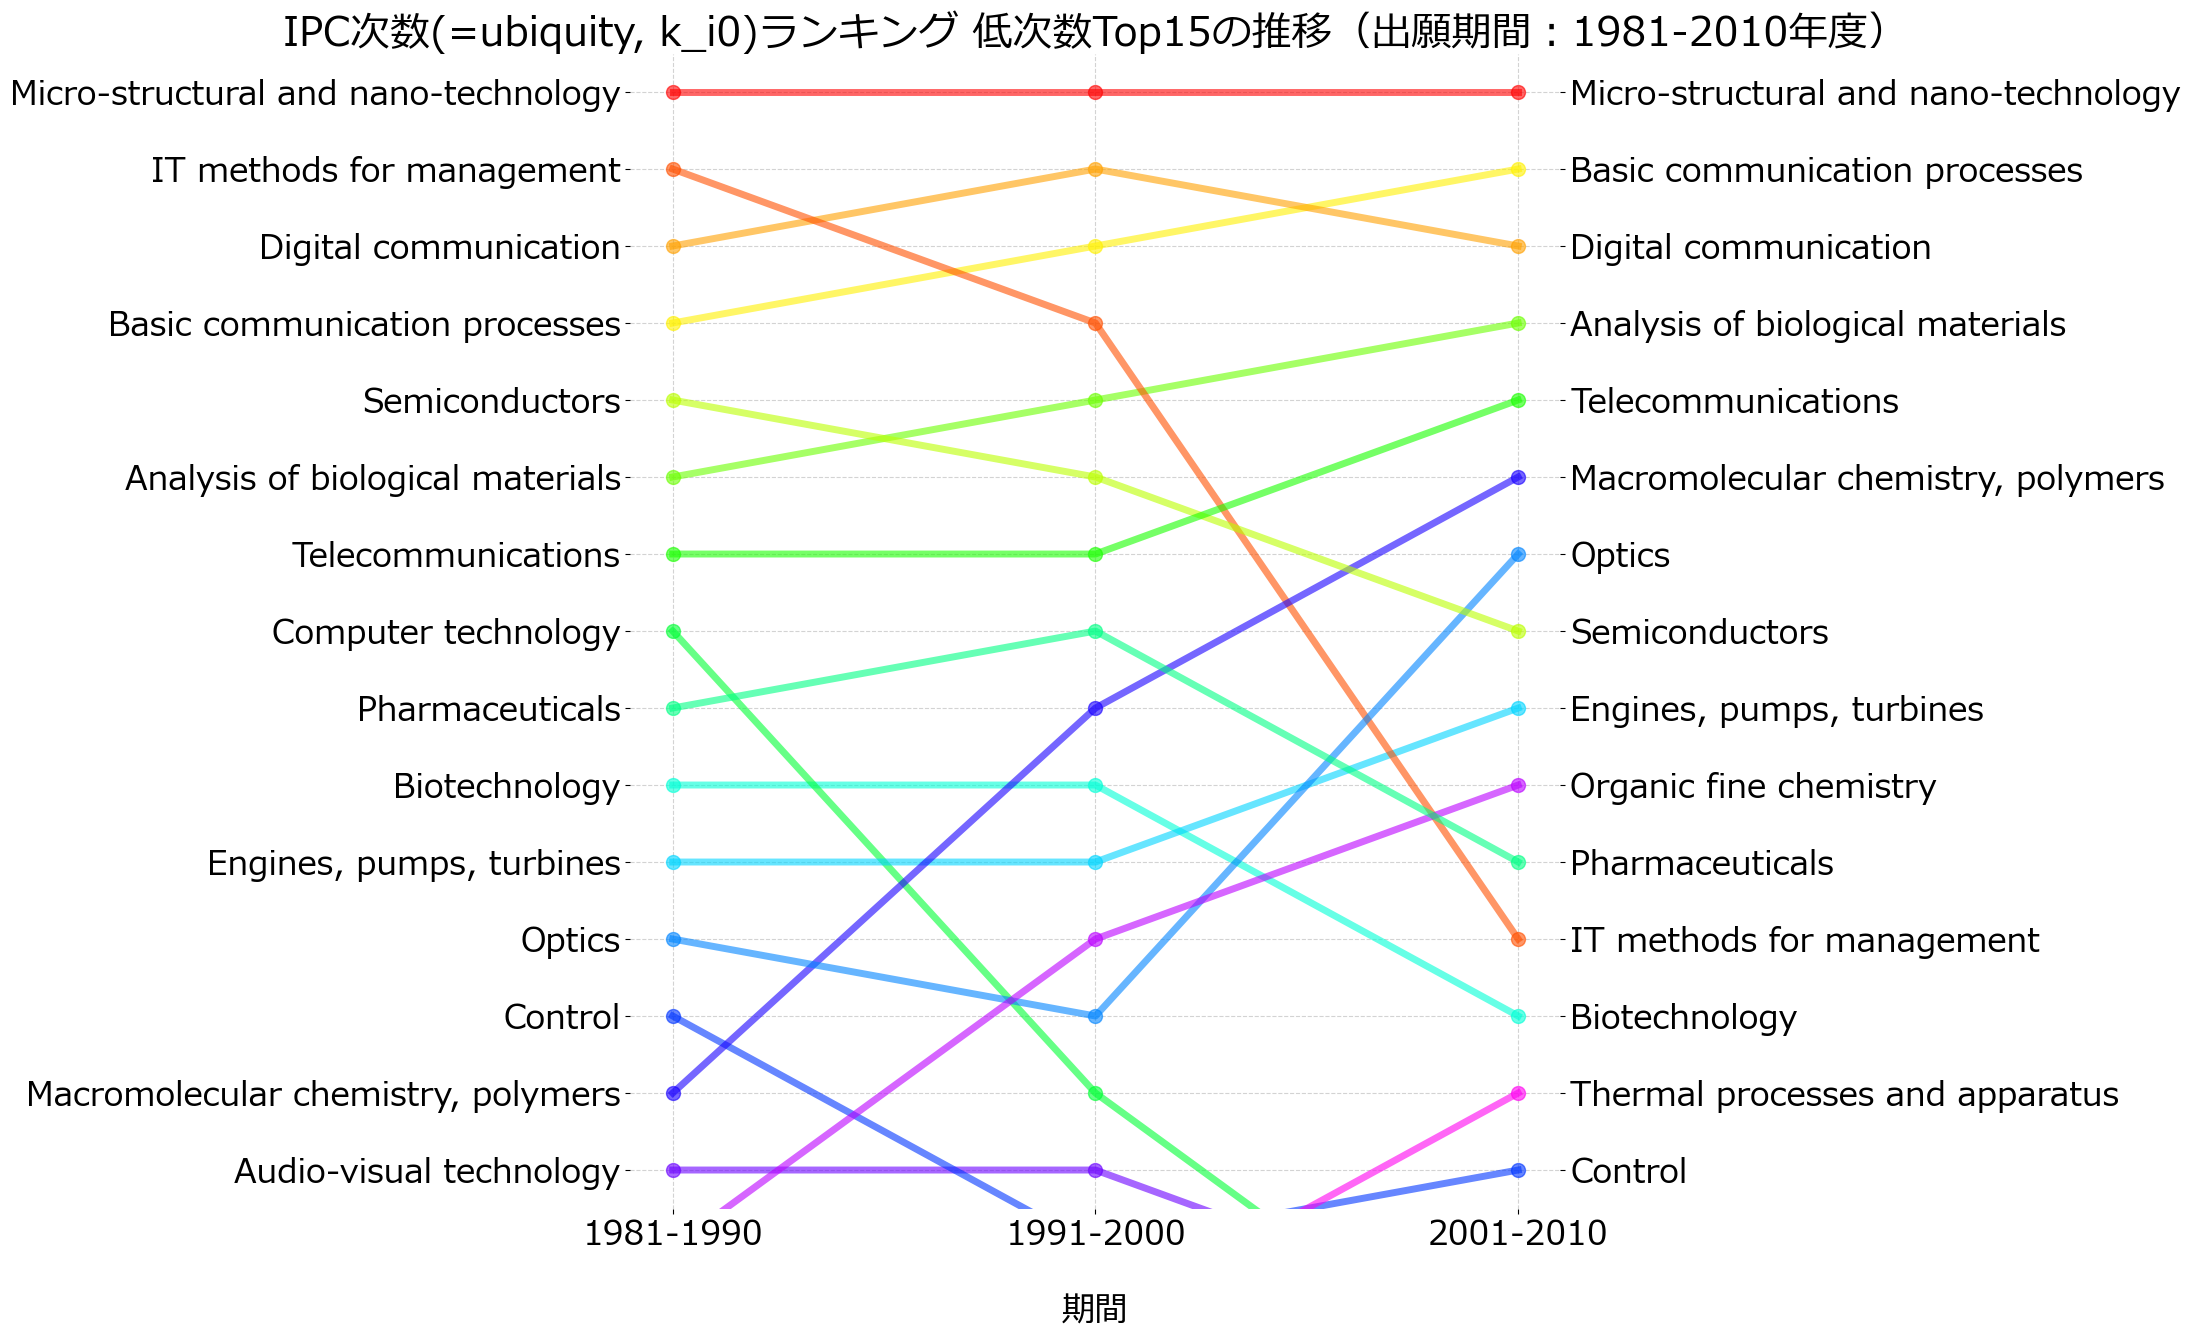

c:\Users\rin\Desktop\KCIinJapaneseFirms\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


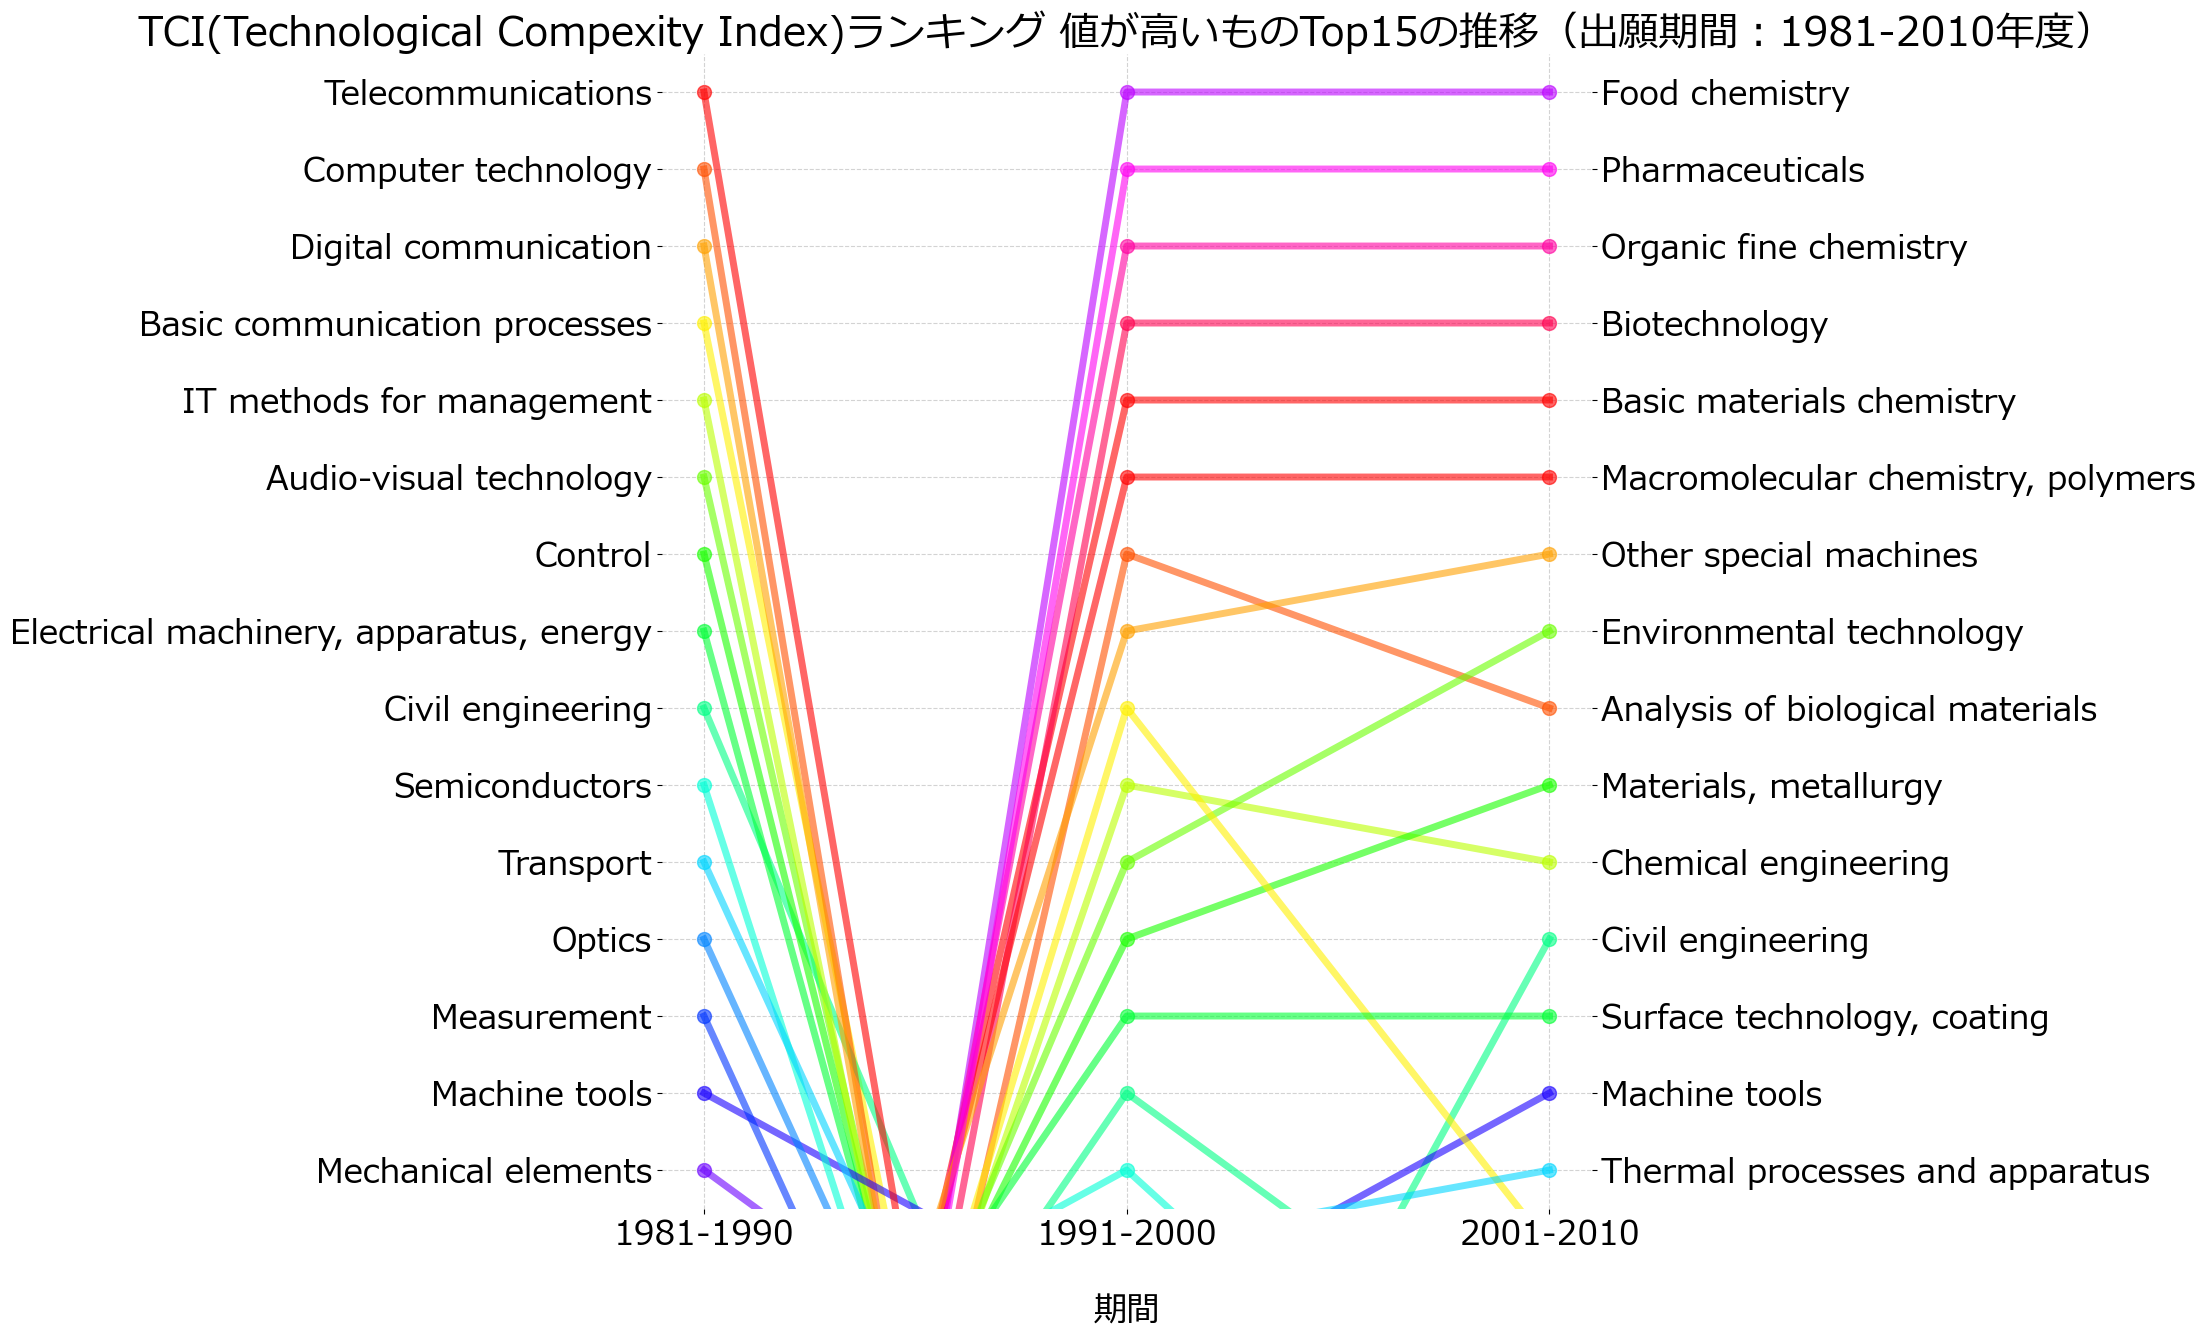

In [14]:
df_dict = {}
combi_dict = {# 1: ['right_person_name', 'Ubiquity', f'特許権者次数(=Ubiquity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 1: ['right_person_name', '', f'特許権者次数(=Ubiquity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 2: ['right_person_name', 'Ubiquity', f'特許権者次数(=Ubiquity，k_h0)ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 3: ['right_person_name', 'eci', f'KCIランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 3: ['right_person_name', 'ipc_class_num', f'IPC数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 4: ['right_person_name', 'kci', f'KCIランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              5: [classification, 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 低次数Top15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 6: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 高次数Top15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 7: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が低いものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              8: [classification, 'tci', f'TCI(Technological Compexity Index)ランキング 値が高いものTop15の推移（出願期間：{year_start}-{year_end}年度）', False]
              }


for i, combi in combi_dict.items():
    div_df = df[[f'{ar}_{year_style}_period']+combi[:1+1]].sort_values(by=[f'{ar}_{year_style}_period', combi[1]], ascending=[True, False]).copy()
    div_df = div_df.drop_duplicates(keep='first')
    div_df_dict = {}
    for year in range(year_start, year_end+1, year_range):
        period = f'{year}-{year+year_range-1}'
        div_df_dict[period] = div_df[div_df[f'{ar}_{year_style}_period']==period].copy()
        # display(div_df_dict[f'{year}-{year+year_range-1}'].head(15))
    if i==4:
        df['kci_rank'] = df.groupby(f'{ar}_{year_style}_period')[['kci']].rank(ascending=False, method='first').reset_index(drop=False)['kci']
        # display(c_df[c_df['right_person_name'].str.contains('三菱重工業')])
    if i > 4: fs = (12, 15)
    else: fs = (10, 12)
    # display(div_df)
    sample = vr.rank_doubleaxis(div_df_dict, 
                version='kci', 
                    rank_num=15,
                    member_col=combi[0], 
                    num_col=combi[1],
                    prop_dict={
                        'figsize': fs,
                        'xlabel': '期間',
                        'ylabel': '',
                        'title': combi[2],
                        'fontsize': 24, 
                        'year_range': year_range, 
                        'ascending': combi[3], 
                        # 'color': color_dict
                        'color': 'default'
                    })
    # plt.tight_layout()
    plt.savefig(f'{output_dir}/figures/{combi[1]}_{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.png', bbox_inches="tight")
    plt.show()
